<a id='table_of_contents'></a>

# Table of Contents

<ul>
    <li><a href='#section_0'>Section 0: Introduction</a></li>
    <li><a href='#section_1'>Section 1: Data Loading</a></li>
    <li><a href='#section_2'>Section 2: Data Preprocessing</a></li>
    <li><a href='#section_3'>Section 3: Exploratory Data Analysis</a></li>
    <li><a href='#section_4'>Section 4: Hypothesis Testing</a></li>
</ul>

<a id='section_0'></a>

# Section 0: Introduction
<a href='#section_1'>[Skip to Data Loading]</a>

As a continuation of the examination of Taxi companies, we now turn our investigation to two datasets.

For each dataset, we will

- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the result

<a id='section_1'></a>

# Section 1: Data Loading
<a href='#section_2'>[Skip to Data Preprocessing]</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html
from scipy import stats as st
import sys
import warnings
import datetime

In [2]:
# Helper boilerplate
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option("display.precision", 2)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# Two Days in Nov 2017
# company_name: taxi company name
# trips_amount: the number of rides for each taxi company on November 15-16, 2017
data_two_days = pd.read_csv("/datasets/project_sql_result_01.csv")

# Neighborhoods
# dropoff_location_name: Chicago neighborhoods where rides ended
# average_trips: the average number of rides that ended in each neighborhood in November 2017
data_neighborhoods = pd.read_csv("/datasets/project_sql_result_04.csv")

# Loop to O'Hare
# contains data on rides from the Loop to O'Hare International Airport
#    start_ts: pickup date and time
#    weather_conditions: weather conditions at the moment the ride started
#    duration_seconds: ride duration in seconds
data_loop_to_ohare = pd.read_csv("/datasets/project_sql_result_07.csv")

In [4]:
print("Rides for 2017-11-15 until 2017-11-16\n")
display(data_two_days.info())
display_side_by_side(data_two_days.head(), data_two_days.describe())

Rides for 2017-11-15 until 2017-11-16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

company_name 
 trips_amount 
 
 
 
 
 0 
 Flash Cab 
 19558 
 
 
 1 
 Taxi Affiliation Services 
 11422 
 
 
 2 
 Medallion Leasing 
 10367 
 
 
 3 
 Yellow Cab 
 9888 
 
 
 4 
 Taxi Affiliation Service Yellow 
 9299 
 
 
 
 
 
 
 trips_amount 
 
 
 
 
 count 
 64.00 
 
 
 mean 
 2145.48 
 
 
 std 
 3812.31 
 
 
 min 
 2.00 
 
 
 25% 
 20.75 
 
 
 50% 
 178.50 
 
 
 75% 
 2106.50 
 
 
 max 
 19558.00

### Notes

- There are no missing values, and the units appear to be suitable (string and int)
- ~20000 trips in a two-day period seems like a lot; it's nearly twice as many as the second place company, making Flash Cab an obvious outlier (the difference between the median and mean should also make this clear).
- 2 rides in two days also seems like a bit of an outlier (a private, one-man cab company with very short working hours?). Also, an obvious outlier.

In [5]:
print("Average Number of Rides Ending in Each Neighborhood for November\n")
display(data_neighborhoods.info())
display_side_by_side(data_neighborhoods.head(), data_neighborhoods.describe())

Average Number of Rides Ending in Each Neighborhood for November

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

dropoff_location_name 
 average_trips 
 
 
 
 
 0 
 Loop 
 10727.47 
 
 
 1 
 River North 
 9523.67 
 
 
 2 
 Streeterville 
 6664.67 
 
 
 3 
 West Loop 
 5163.67 
 
 
 4 
 O'Hare 
 2546.90 
 
 
 
 
 
 
 average_trips 
 
 
 
 
 count 
 94.00 
 
 
 mean 
 599.95 
 
 
 std 
 1714.59 
 
 
 min 
 1.80 
 
 
 25% 
 14.27 
 
 
 50% 
 52.02 
 
 
 75% 
 298.86 
 
 
 max 
 10727.47

### Notes

- There are no missing values, and the units appear to be suitable (string and float)
- There are a number of outliers that drag the mean 10x higher than the median.

In [6]:
print("Rides from the Loop to O'Hare\n")
display(data_loop_to_ohare.info())
display_side_by_side(data_loop_to_ohare.head(), data_loop_to_ohare.describe())

Rides from the Loop to O'Hare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

start_ts 
 weather_conditions 
 duration_seconds 
 
 
 
 
 0 
 2017-11-25 16:00:00 
 Good 
 2410.0 
 
 
 1 
 2017-11-25 14:00:00 
 Good 
 1920.0 
 
 
 2 
 2017-11-25 12:00:00 
 Good 
 1543.0 
 
 
 3 
 2017-11-04 10:00:00 
 Good 
 2512.0 
 
 
 4 
 2017-11-11 07:00:00 
 Good 
 1440.0 
 
 
 
 
 
 
 duration_seconds 
 
 
 
 
 count 
 1068.00 
 
 
 mean 
 2071.73 
 
 
 std 
 769.46 
 
 
 min 
 0.00 
 
 
 25% 
 1438.25 
 
 
 50% 
 1980.00 
 
 
 75% 
 2580.00 
 
 
 max 
 7440.00

### Notes

- There are no missing values, but the units appear to be unsuitable for the duration_seconds column:
    - The units should be int, as they are appropriately measured as discrete intervals (this isn't the olympics)
- The zero-second duration is also troublesome
    - This could possibly be the result of a nullified trip (e.g., the cab broke down mid-trip and thus cancelled the trip, but did not delete the record)
    - This could also be the result of cancelled trips (e.g., someone calls for a cab, but the passenger never shows up) 

### Conclusion

- We will only have to change the units for one column in the data of the last dataset

<a id='section_2'></a>

# Section 2: Data Preprocessing
<a href='#section_3'>[Skip to Exploratory Data Analysis]</a>

In [7]:
data_loop_to_ohare["duration_seconds"] = data_loop_to_ohare["duration_seconds"].astype(int) 
display(data_loop_to_ohare.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int64
dtypes: int64(1), object(2)
memory usage: 25.2+ KB


None

### Conclusion

We changed the duration in seconds units from float to int

<a id='section_3'></a>

# Section 3: Exploratory Data Analysis
<a href='#section_4'>[Skip to Hypothesis Testing]</a>

In [8]:
# identify the top 10 neighborhoods in terms of drop-offs
data_neighborhoods.nlargest(10, "average_trips")

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


### Notes

- There is nearly a tenfold gap between the most popular dropoff point (The Loop) and the tenth most popular (Sheffield & DePaul)

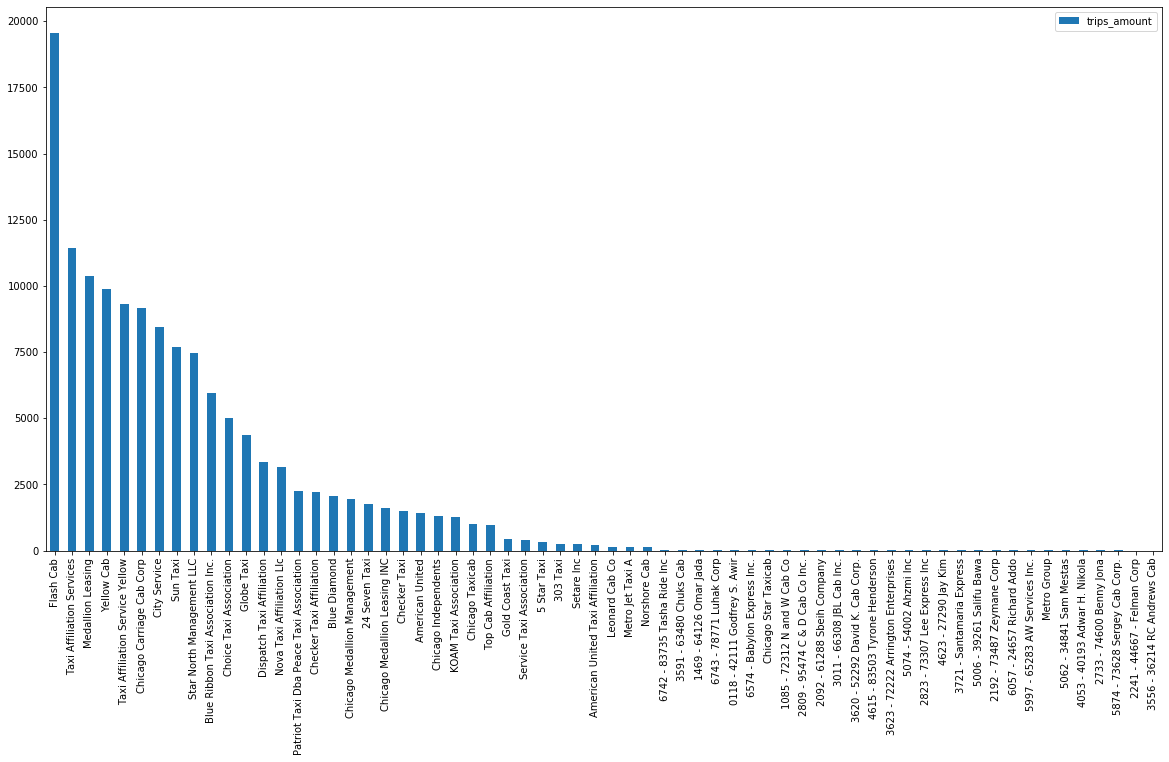

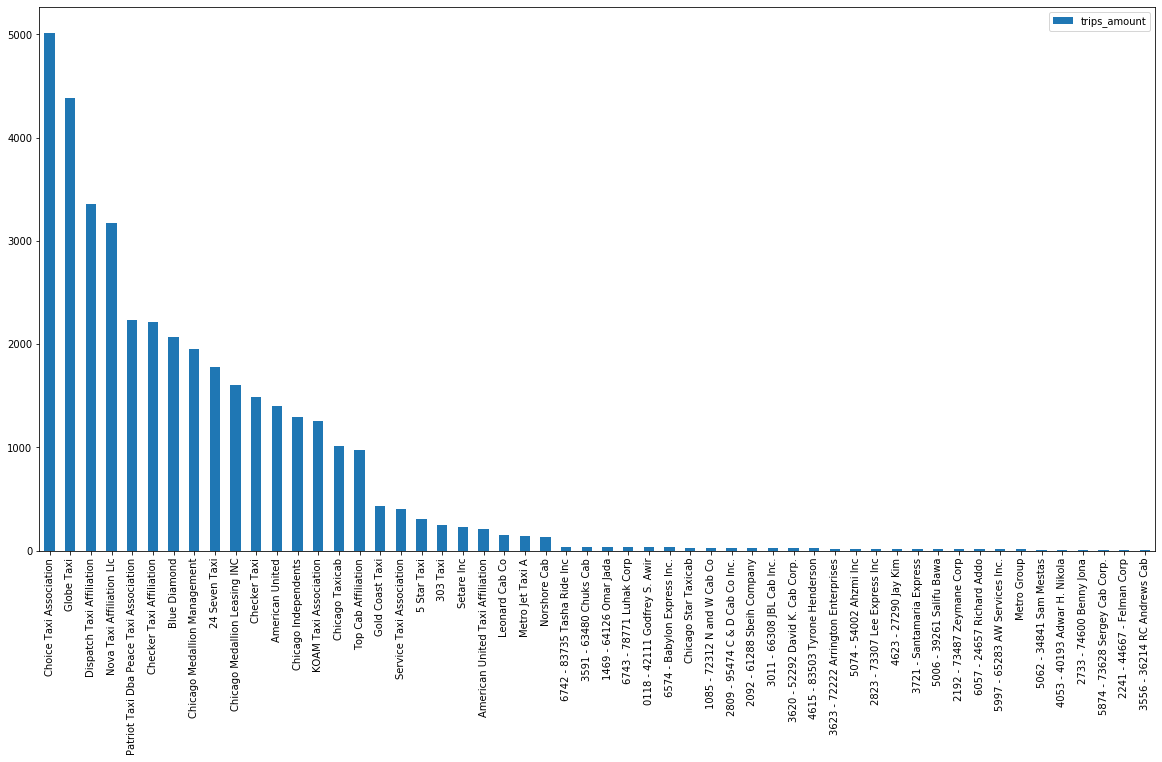

In [9]:
# make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
data_two_days_no_outliers = data_two_days.query("trips_amount < 5500")

ax = data_two_days.plot(kind="bar", figsize=(20,10))
ax.set_xticklabels(data_two_days["company_name"], rotation=90)
ax_2 = data_two_days_no_outliers.plot(kind="bar", figsize=(20,10))
ax_2.set_xticklabels(data_two_days_no_outliers["company_name"], rotation=90)
plt.show()

In [10]:
print("Length data_two_days original: {} | Length data_two_days_no_outliers: {}"\
      .format(len(data_two_days), len(data_two_days_no_outliers)))

Length data_two_days original: 64 | Length data_two_days_no_outliers: 54


### Notes

- Here we see that the top ten cab companies are all outliers with more than 5500 rides in a two-day period.
    - Clearly these top ten companies are aware of the best spots to patrol
- The median rests well below that mark, however, at a mere 178.5 rides in the two-day period.

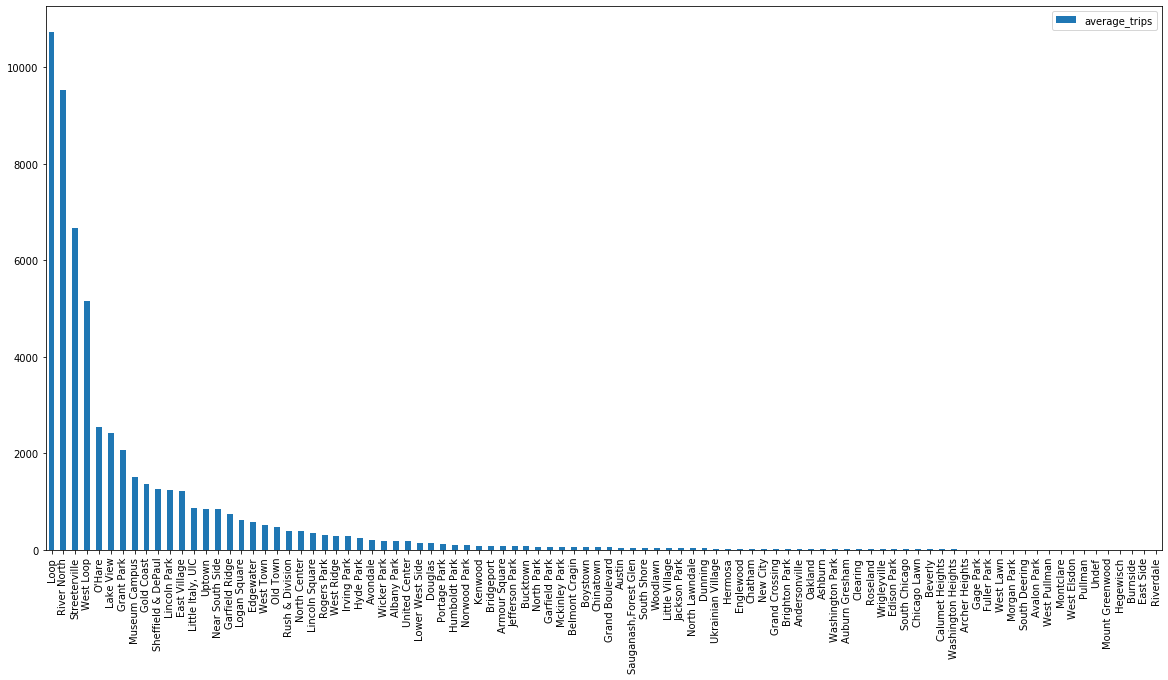

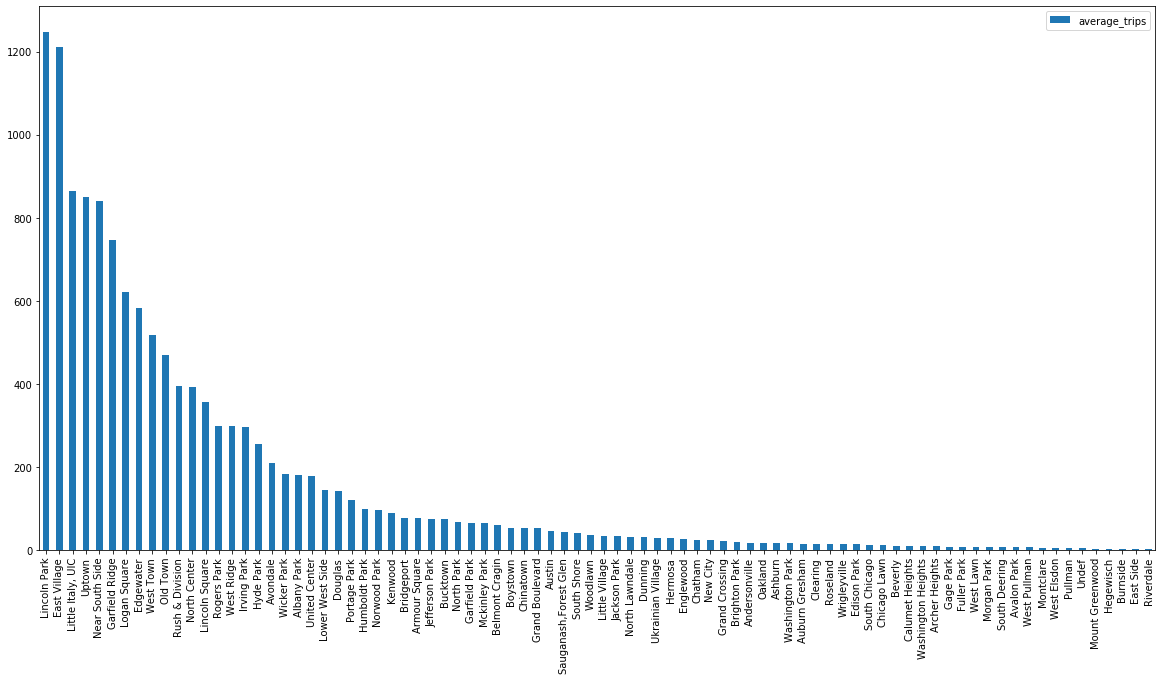

In [11]:
data_neighborhoods_no_outliers = data_neighborhoods.query("average_trips < 1250")

ax = data_neighborhoods.plot(kind="bar", figsize=(20,10))
ax.set_xticklabels(data_neighborhoods["dropoff_location_name"], rotation=90)
ax_2 = data_neighborhoods_no_outliers.plot(kind="bar", figsize=(20,10))
ax_2.set_xticklabels(data_neighborhoods_no_outliers["dropoff_location_name"], rotation=90)
plt.show()

In [12]:
print("Length data_neighborhoods original: {} | Length data_neighborhoods_no_outliers: {}"\
      .format(len(data_neighborhoods), len(data_neighborhoods_no_outliers)))

Length data_neighborhoods original: 94 | Length data_neighborhoods_no_outliers: 84


### Notes

- A similar tale unfolds with the average trips ending in certain neighborhoods.
    - It may be possible that Flash Cab and other top cab services have a strangehold on the Loop and other top destinations.

### Conclusion

Even within the top four neighborhoods, there is a steep decline in number of rides from ~10000 at the Loop to ~5000 at the West Loop. 

However, better than looking at the destinations, perhaps looking at pickup points would offer greater insights into where to find the most potential customers, and thus, where to concentrate our cab fleet.

<a id='section_4'></a>

# Section 4: Hypothesis Testing

We are testing the hypothesis that 

    The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
    
Thus the null hypothesis is that there is not a significant change, and the alternative hypothesis is that there is. We will use an alpha of 0.05 due to the limited amount of data we have so that we can account for the greater variability likely present in a smaller dataset.

In [13]:
def avg_duration(data_slice):
    length_data = len(data_slice)
    sum_durations = sum(data_slice)
    print ("Number of rides: {}".format(length_data))
    print ("Sum total duration of rides: {}".format(sum_durations))
    if length_data > 0:
        print ("Average total duration of rides: {:0.2f}".format(sum_durations / length_data))
    else:
        print ("Average total duration of rides: 0")
        
rainy_sat = []
sat = []
rainy = []
others_rs = []
others_s = []
others_r = []

year = 2017
month = 11
    
for index, row in data_loop_to_ohare.iterrows():
    day = int(row["start_ts"][9:11])
    # inclement weather check
    if row["weather_conditions"] == "Bad":
        rainy.append(row["duration_seconds"])
    else:
        others_r.append(row["duration_seconds"])
        
    # saturday check
    if datetime.date(year, month, day).weekday()==6:
        sat.append(row["duration_seconds"])
    else:
        others_s.append(row["duration_seconds"])
        
    # saturday or sat and inclement weather check
    if datetime.date(year, month, day).weekday()==6:
        if row["weather_conditions"] == "Bad":
            rainy_sat.append(row["duration_seconds"])
        else:
            others_rs.append(row["duration_seconds"])
    else:
        others_rs.append(row["duration_seconds"])

print("RAINY SATURDAYS")
avg_duration(rainy_sat)
print("\nSATURDAYS")
avg_duration(sat)
print("\nRAINY")
avg_duration(rainy)
print("\nOTHER DAYS THAN RAINY SATURDAYS")
avg_duration(others_rs)
print("\nOTHER DAYS THAN SATURDAYS")
avg_duration(others_s)
print("\nOTHER DAYS THAN RAINY")
avg_duration(others_r)

print("\nT-TEST & P-VALUE (RAINY SAT vs. NON-RAINY SAT)")
results = st.ttest_ind(rainy_sat, others_rs)
print(f"Saturdays vs Other Days average ride duration p-value: {results.pvalue:0.5f}")
print("\nT-TEST & P-VALUE (SAT vs. NON-SAT)")
results = st.ttest_ind(sat, others_s)
print(f"Saturdays vs Other Days average ride duration p-value: {results.pvalue:0.5f}")
print("\nT-TEST & P-VALUE (RAINY vs. NON-RAINY)")
results = st.ttest_ind(rainy, others_r)
print(f"Rainy vs Other Days average ride duration p-value: {results.pvalue:0.15f}")

RAINY SATURDAYS
Number of rides: 0
Sum total duration of rides: 0
Average total duration of rides: 0

SATURDAYS
Number of rides: 95
Sum total duration of rides: 178058
Average total duration of rides: 1874.29

RAINY
Number of rides: 180
Sum total duration of rides: 436897
Average total duration of rides: 2427.21

OTHER DAYS THAN RAINY SATURDAYS
Number of rides: 1068
Sum total duration of rides: 2212609
Average total duration of rides: 2071.73

OTHER DAYS THAN SATURDAYS
Number of rides: 973
Sum total duration of rides: 2034551
Average total duration of rides: 2091.01

OTHER DAYS THAN RAINY
Number of rides: 888
Sum total duration of rides: 1775712
Average total duration of rides: 1999.68

T-TEST & P-VALUE (RAINY SAT vs. NON-RAINY SAT)
Saturdays vs Other Days average ride duration p-value: nan

T-TEST & P-VALUE (SAT vs. NON-SAT)
Saturdays vs Other Days average ride duration p-value: 0.00873

T-TEST & P-VALUE (RAINY vs. NON-RAINY)
Rainy vs Other Days average ride duration p-value: 0.000000

### Conclusion

It is impossible to tell with the data we have because there are no records for rides on rainy Saturdays. When looking at fair-weather Saturdays, however, we notice that rides are indeed shorter--likely in no small part due to the absence of rush-hour traffic.

The fact that there are no rides on rainy Saturdays may be due to chance, but it could also be an indicator that storms and flights don't mix well and would give less of a reason to the airport.

<a href='#table_of_contents'>[Return to the Table of Contents]</a>